# <font color=Black>Abstract</font> 

Bid is a offer (a certain price) for something, especially at an auction.

The Ebay dataset consist of many auctions of a popular product. The dataset contains information that can help to predict the bids in the future. However, imbalanced class problems and outliers are the two most challenging limitations of this dataset to predict the bids in the future. The prediction results can be affected by the way of handling the outliers and imbalanced class problem.

In this document, I present the characteristics of the dataset, application of data preparation and EDA visualization, scaling, and feature engineering, exploring the possibility of using dimensional reduction on the dataset by Employing both LDA (Linear Discriminant Analysis) and PCA (Principal Component Analysis) and comparing the separation of classes through visualization and the choice of machine learning approaches (supervised / unsupervised) for the provided data set, the experimentation of two models with proper parameter selection using hyperparameters and a comparison between the chosen modelling approaches. I will use cross-validation, confusion matrix and classification report to provide authenticity of the modelling outcomes and a comparison of ML modelling outcomes using a Table.

My main goal in this project is create a model to predict the bids in the future, using classification algorithms to classifie the bids as "0" normal behaviour bids or "1" as anomalous bids. 


# <font color=Black>Data Dictionary</font>

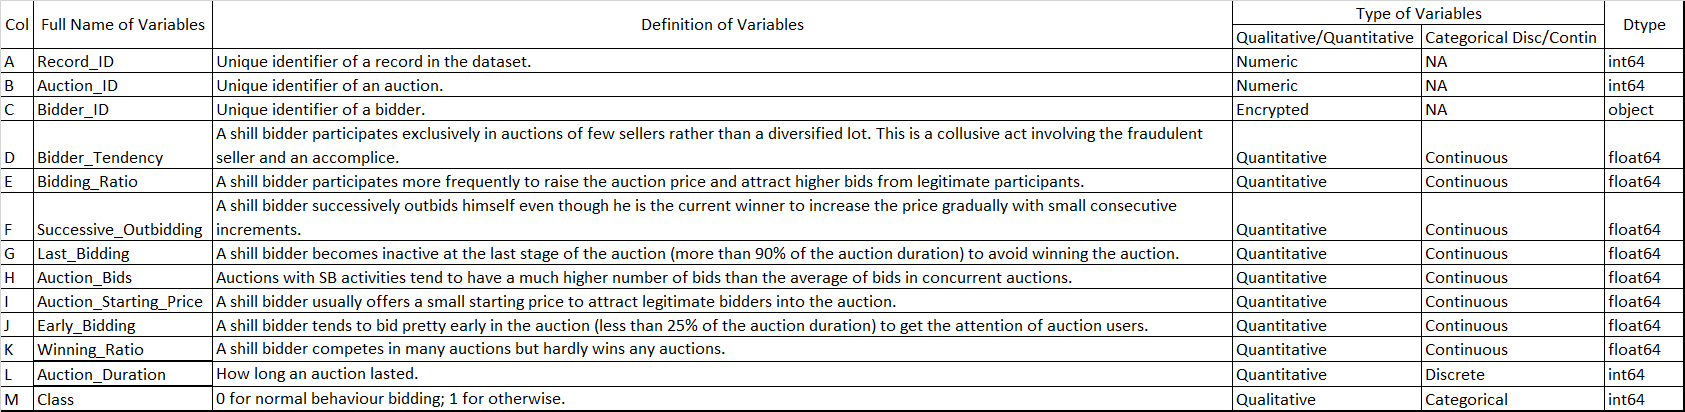

 - Record ID: Unique identifier of a record in the dataset.
 - Auction ID: Unique identifier of an auction.
 - Bidder ID: Unique identifier of a bidder.
 - Bidder Tendency: A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice.
 - Bidding Ratio: A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.
 -  Successive Outbidding: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.
 - Last Bidding: A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning the auction.
 -  Auction Bids: Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.
 - Auction Starting Price: a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.
 - Early Bidding: A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users.
 -  Winning Ratio: A shill bidder competes in many auctions but hardly wins any auctions.
 -  Auction Duration: How long an auction lasted.
 - Class: 0 for normal behaviour bidding; 1 for otherwise.
 


# <font color=Black>Introduction</font>
Online retailer, eBay is providing an option of bidding to their customers globally. Bidding is employed to find the real price of items in the market based on the demand. The price offered by anyone participating in this process is termed as a 'bid'.
The dataset for this CA is a public dataset collected from the UCI machine learning repository (“https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset) that was scraped from auctions of a popular product and is composed of 6321 instances from Ebay.

The dataset consists of two classes. “0” class means normal bid. And “1” class means the anomalous. The aim of this dataset is to correctly predict if the bid will be considered a normal bid or an anomalous. The prediction result is highly beneficial to the users as it will help to simulate a bid before an auction and not be classified as an anomalous.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("data/Shill_Bidding_Dataset.csv")

# First Section - Data Preparation
## ●Undestanding the data and the Characterisation.
In this part I want to check the dataset characteristics such as index type, columns, non-null values, size and memory usage, mean, median and mode, 5 Number Summary and dtype for a better understanding of what I will handle.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [3]:
df.shape

(6321, 13)

In [4]:
df.size

82173

In [5]:
df.head()

Record_ID  Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
0          1         732     _***i         0.200000       0.400000   
1          2         732     g***r         0.024390       0.200000   
2          3         732     t***p         0.142857       0.200000   
3          4         732     7***n         0.100000       0.200000   
4          5         900     z***z         0.051282       0.222222   

   Successive_Outbidding  Last_Bidding  Auction_Bids  Starting_Price_Average  \
0                    0.0      0.000028           0.0                0.993593   
1                    0.0      0.013123           0.0                0.993593   
2                    0.0      0.003042           0.0                0.993593   
3                    0.0      0.097477           0.0                0.993593   
4                    0.0      0.001318           0.0                0.000000   

   Early_Bidding  Winning_Ratio  Auction_Duration  Class  
0       0.000028       0.666667                 5      0  
1       0.013123       0.944444                 5      0  
2       0.003042       1.000000                 5      0  
3       0.097477       1.000000                 5      0  
4       0.001242       0.500000                 7      0

In [6]:
df.tail()

Record_ID  Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
6316      15129         760     l***t         0.333333       0.160000   
6317      15137        2481     s***s         0.030612       0.130435   
6318      15138        2481     h***t         0.055556       0.043478   
6319      15139        2481     d***d         0.076923       0.086957   
6320      15144        2481     a***l         0.016393       0.043478   

      Successive_Outbidding  Last_Bidding  Auction_Bids  \
6316                    1.0      0.738557      0.280000   
6317                    0.0      0.005754      0.217391   
6318                    0.0      0.015663      0.217391   
6319                    0.0      0.068694      0.217391   
6320                    0.0      0.340351      0.217391   

      Starting_Price_Average  Early_Bidding  Winning_Ratio  Auction_Duration  \
6316                0.993593       0.686358       0.888889                 3   
6317                0.993593       0.000010       0.878788                 7   
6318                0.993593       0.015663       0.000000                 7   
6319                0.993593       0.000415       0.000000                 7   
6320                0.993593       0.340351       0.000000                 7   

      Class  
6316      1  
6317      0  
6318      0  
6319      0  
6320      0

In [7]:
df.isnull().sum()

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

As the only one object feature we have is a Bidder_ID I want to see if I have any unique values and then decide if we need to keep the feature.

In [8]:
df.Bidder_ID.value_counts()

a***a    112
n***t     85
e***e     67
i***a     50
r***r     49
        ... 
n***y      1
u***z      1
t***9      1
z***b      1
9***7      1
Name: Bidder_ID, Length: 1054, dtype: int64

I can observe that this variable have 1054 unique values. I can not really extract any usefull information from it as it is represented by encrypted unique names, therefore I will simply drop it when I start the Data Preparation process.

I want to see the same for Record_ID, as my first impressions are that this variable appears to have a unique value for each ID, if so, I will not keep it as it will not have any relevance to my dependent variable.

In [9]:
df.Record_ID.value_counts()

1        1
10015    1
10013    1
10011    1
10009    1
        ..
5032     1
5031     1
5026     1
5024     1
15144    1
Name: Record_ID, Length: 6321, dtype: int64

As I can see, all the values are unique, so I will drop this variable when I start the Data Preparation process.

In [10]:
df.describe(include='all')

Record_ID   Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
count    6321.000000  6321.000000      6321      6321.000000    6321.000000   
unique           NaN          NaN      1054              NaN            NaN   
top              NaN          NaN     a***a              NaN            NaN   
freq             NaN          NaN       112              NaN            NaN   
mean     7535.829457  1241.388230       NaN         0.142541       0.127670   
std      4364.759137   735.770789       NaN         0.197084       0.131530   
min         1.000000     5.000000       NaN         0.000000       0.011765   
25%      3778.000000   589.000000       NaN         0.027027       0.043478   
50%      7591.000000  1246.000000       NaN         0.062500       0.083333   
75%     11277.000000  1867.000000       NaN         0.166667       0.166667   
max     15144.000000  2538.000000       NaN         1.000000       1.000000   

        Successive_Outbidding  Last_Bidding  Auction_Bids  \
count             6321.000000   6321.000000   6321.000000   
unique                    NaN           NaN           NaN   
top                       NaN           NaN           NaN   
freq                      NaN           NaN           NaN   
mean                 0.103781      0.463119      0.231606   
std                  0.279698      0.380097      0.255252   
min                  0.000000      0.000000      0.000000   
25%                  0.000000      0.047928      0.000000   
50%                  0.000000      0.440937      0.142857   
75%                  0.000000      0.860363      0.454545   
max                  1.000000      0.999900      0.788235   

        Starting_Price_Average  Early_Bidding  Winning_Ratio  \
count              6321.000000    6321.000000    6321.000000   
unique                     NaN            NaN            NaN   
top                        NaN            NaN            NaN   
freq                       NaN            NaN            NaN   
mean                  0.472821       0.430683       0.367731   
std                   0.489912       0.380785       0.436573   
min                   0.000000       0.000000       0.000000   
25%                   0.000000       0.026620       0.000000   
50%                   0.000000       0.360104       0.000000   
75%                   0.993593       0.826761       0.851852   
max                   0.999935       0.999900       1.000000   

        Auction_Duration        Class  
count        6321.000000  6321.000000  
unique               NaN          NaN  
top                  NaN          NaN  
freq                 NaN          NaN  
mean            4.615093     0.106787  
std             2.466629     0.308867  
min             1.000000     0.000000  
25%             3.000000     0.000000  
50%             5.000000     0.000000  
75%             7.000000     0.000000  
max            10.000000     1.000000

##### Observation:

As I can see, the dataset is composed mostly of numerical data with one column representing 'object' data type (Bider_ID). There are 6321 rows and 13 columns in the dataset. Also, as observed with df.isnull.sum(), the dataset does not contain missing values. so, they will not need to be handled in the next chapter. The table above shows that values range from 0 to 1 for each feature except Auction_Duration and Auction_ID. Furthermore, I can infer that Winning_Ratio and Successive_Outbidding has many observations that cluster around either 0 or 1 values. In the dependent variable "Class", there are more 0 classes than 1 since the mean is 0.1. This means that the data is imbalanced, and I need to decide what to do about it next.

## ●EDA and Aplication of Data Preparation

In this section, I explore the dataset in more detail to confirm my observations made in the first part and to have a better understanding of the dataset with visualizations. Then I will apply Data Preparation in order of exploring the possibility of using dimensional reduction on the dataset by Employing both LDA (Linear Discriminant Analysis) and PCA (Principal Component Analysis) and prepare the dataset for the two machine learning models that I will perform.

I will start by analysing the observations I made in the previous part and dropping the variable Bidder_ID and Record_ID as I can not extract any usefull information from it as it is represented by encrypted unique names.

In [11]:
df = df.drop(['Bidder_ID','Record_ID'], axis=1)

In [12]:
df.value_counts("Winning_Ratio")

Winning_Ratio
0.000000    3640
1.000000     826
0.750000     143
0.833333     110
0.666667     107
            ... 
0.913043       5
0.950000       5
0.615385       3
0.400000       3
0.625000       2
Length: 72, dtype: int64

Text(0.5, 1.0, 'Distribution of Winning_Ratio')

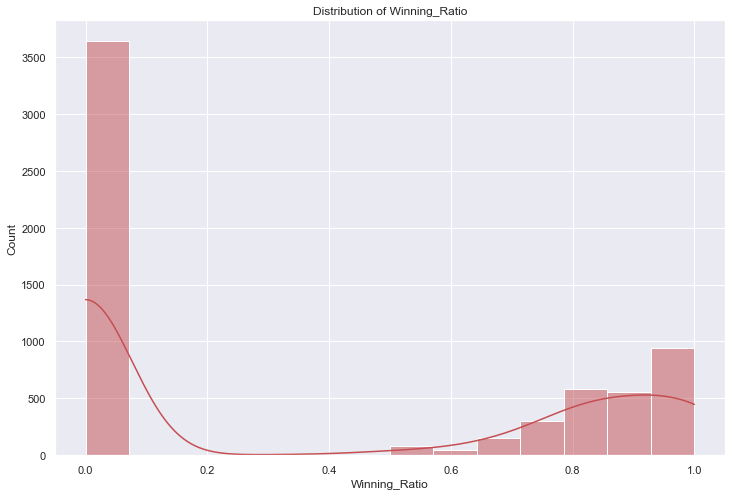

In [13]:
sns.set(style='darkgrid')
ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(df['Winning_Ratio'], kde = True, color = 'r')
plt.title('Distribution of Winning_Ratio')

In [14]:
df.value_counts("Successive_Outbidding")

Successive_Outbidding
0.0    5478
1.0     469
0.5     374
dtype: int64

Text(0.5, 1.0, 'Distribution of Successive_Outbidding')

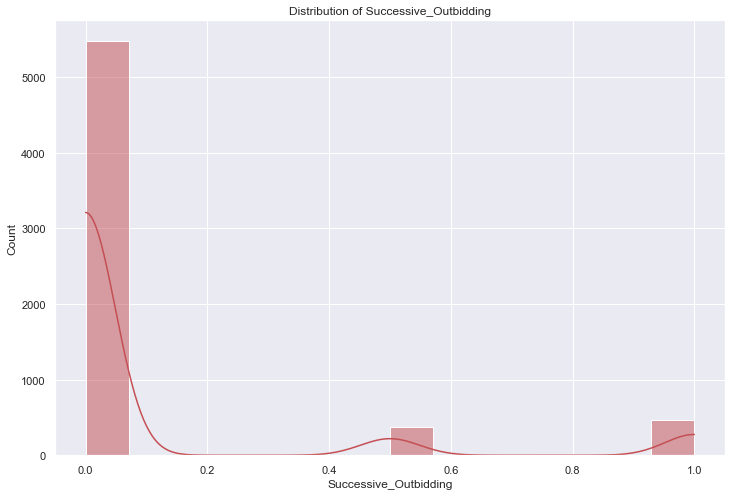

In [15]:
sns.set(style='darkgrid')
ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(df['Successive_Outbidding'], kde = True, color = 'r')
plt.title('Distribution of Successive_Outbidding')

##### Observation:
As I can see, Winning_Ratio and Successive_Outbidding has many observations that cluster around either 0 or 1 values, where Winning_Ration has 3640 "0" and 826 "1" values, this means that among the 6321 users who placed bets 3640 never won while 826 users won 100% when participating in auctions through EBAY. As for Successive_Outbidding I can confirm that there are many observations that cluster around either 0 and 1 values, but because I do not have enough information about the real meaning of 0, 0.5 and 1, I can't do a complete and conclusive analysis.

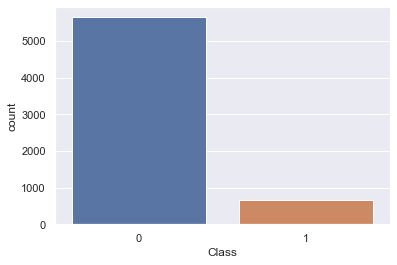

None
0    5646
1     675
Name: Class, dtype: int64


In [16]:
sns.countplot(x ='Class', data = df)
print(plt.show())
print(df.Class.value_counts())

##### Observation:
Through this plot I have complete clarity that the dependent variable is unbalanced and during my data preparation I will create a balanced and an unbalanced version to perform a comparison in the performance of the models I will choose from Machine Learning.

### Distributions of Independent Variables

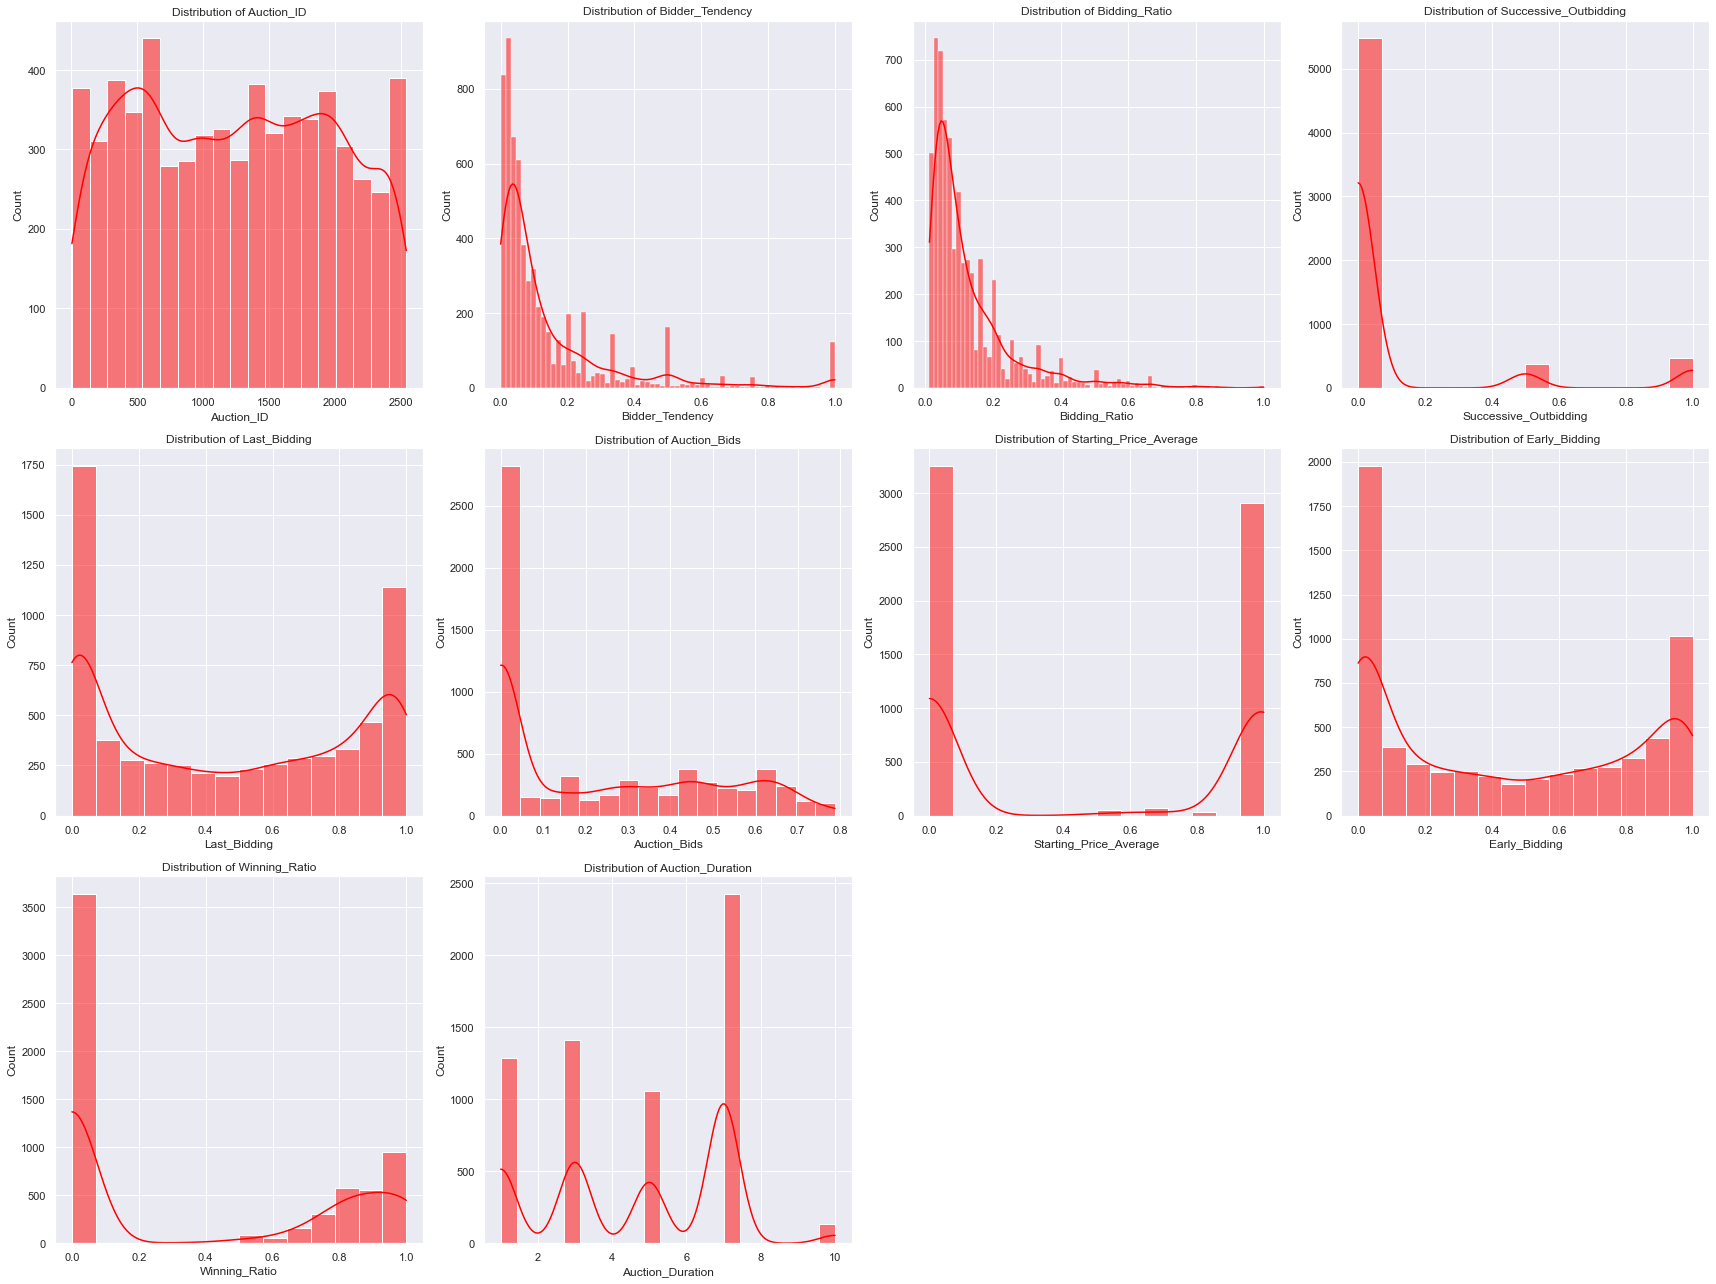

In [17]:
feature_cols=df.columns[:-1].to_numpy()
plt.figure(figsize=(24,18))
for i,col in enumerate(feature_cols):
    plt.subplot(3,4,i+1)
    sns.histplot(data=df,x=col,kde=True,element='bars',color='red')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

##### Observation:

As I can see, all the independent varibles do not follow a  symetrical normal distribution. [2]

### Duplicates

In [18]:
df_duplicated = df[df.duplicated()]
df_duplicated.shape

(0, 11)

##### Observation:
There is no duplicates in this dataset

### Outliers

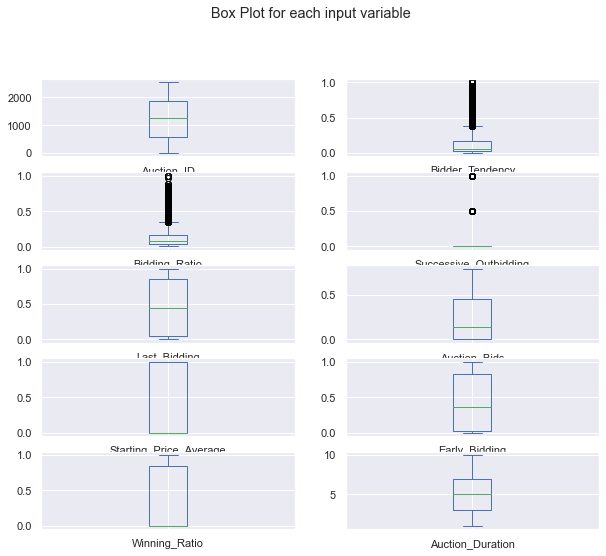

In [19]:
df.drop('Class', axis=1).plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False, figsize=(10,10), title='Box Plot for each input variable')
plt.show()

##### Observation:
As represented by the Boxplots I can clearly see that the Bidder_Tendency and Bidding_Ratio variables contain many outliers and the Successive_Outbidding variable looks interesting, where it is showing that it probably contains outliers.
I will calculate the Interquartile Range to get the exact values of how many outliers each variable contains, then I will do an analysis on each one to decide whether or not to drop the variables.[1],[15],[33]


In [20]:
q1 = df['Bidder_Tendency'].quantile(0.25)
q3 = df['Bidder_Tendency'].quantile(0.75)
iqr = q3 - q1
df_outliers_sum = ((df['Bidder_Tendency'] < (q1 - 1.5 * iqr)) | (df['Bidder_Tendency'] > (q3 + 1.5 * iqr))).sum()
print(df_outliers_sum)

628


In [21]:
q1 = df['Bidding_Ratio'].quantile(0.25)
q3 = df['Bidding_Ratio'].quantile(0.75)
iqr = q3 - q1
df_outliers_sum = ((df['Bidding_Ratio'] < (q1 - 1.5 * iqr)) | (df['Bidding_Ratio'] > (q3 + 1.5 * iqr))).sum()
print(df_outliers_sum)

430


In [22]:
q1 = df['Successive_Outbidding'].quantile(0.25)
q3 = df['Successive_Outbidding'].quantile(0.75)
iqr = q3 - q1
df_outliers_sum = ((df['Successive_Outbidding'] < (q1 - 1.5 * iqr)) | (df['Successive_Outbidding'] > (q3 + 1.5 * iqr))).sum()
print(df_outliers_sum)

843


##### Observation:
For Bidder_Tendency 628 observations as outliers representing around 10% of the variable, for Bidding_Ratio 430 observations as outliers representing around 7% of the variable and for Successive_Outbidding 843 observations as outliers representing around 13.5% of the variable.

As already analysed before, the variable Successive_Outbidding is not outliers because the variable is only represented by 3 values 0, 0.5 and 1. And since most of the values are represented by 0, it ends up making the values of 0.5 and 1 as outliers when I perform the boxplot and the calculation of interquartile range.

On the other hand, I decided that I will keep the Bidder_Tendency and Bidding_Ratio variables since I do not have enough information to interpret their represented values and with that, if I perform an action to remove or change the outliers, I can affect my dataset by losing relevant information or making dataset bias. [1],[15],[20],[33]

### Correlation and Variables Importance 

<AxesSubplot:>

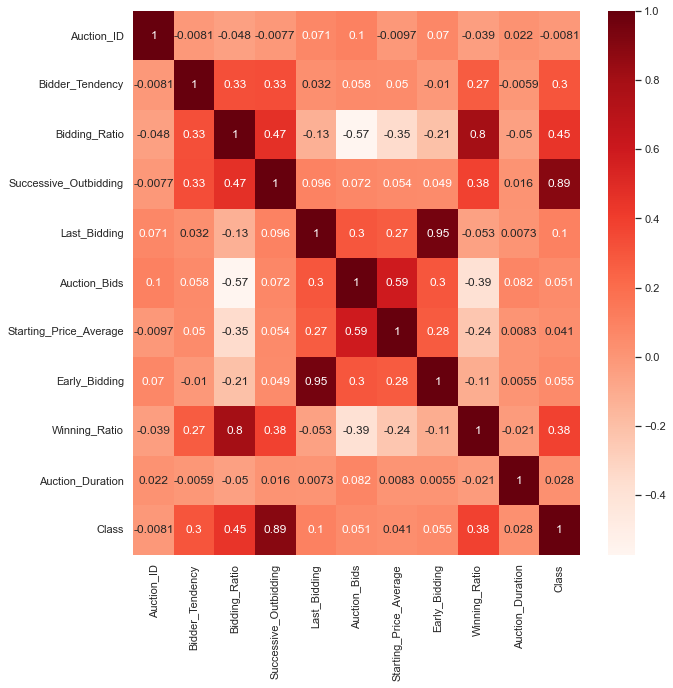

In [23]:
correlation = df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(correlation, cmap= 'Reds', annot = True)

##### Observation:
As represented by the Heatmap Correlation, the Successive_Outbidding is the independent varible that have a strong correlation with the dependent varible Class. 

In order to get better undestand of the dependent variable and the independet I will be using the DecisionTreeClassifier which will range fetures by their importance.
Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature. [8],[27],[31]

As a first step of defining features importances I will separate independent variables from the dependent variable and I Will run the DecisionTreeCLassifier.

In [24]:
X = df.drop(columns = 'Class')
y = df['Class']

In [25]:
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier()
cls.fit(X, y)

DecisionTreeClassifier()

In [26]:
importances = cls.feature_importances_
columns = X.columns
columns

Index(['Auction_ID', 'Bidder_Tendency', 'Bidding_Ratio',
       'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids',
       'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio',
       'Auction_Duration'],
      dtype='object')

I want to plot a graph to display features importances in descending order.

Text(0, 0.5, 'Percentage of importances')

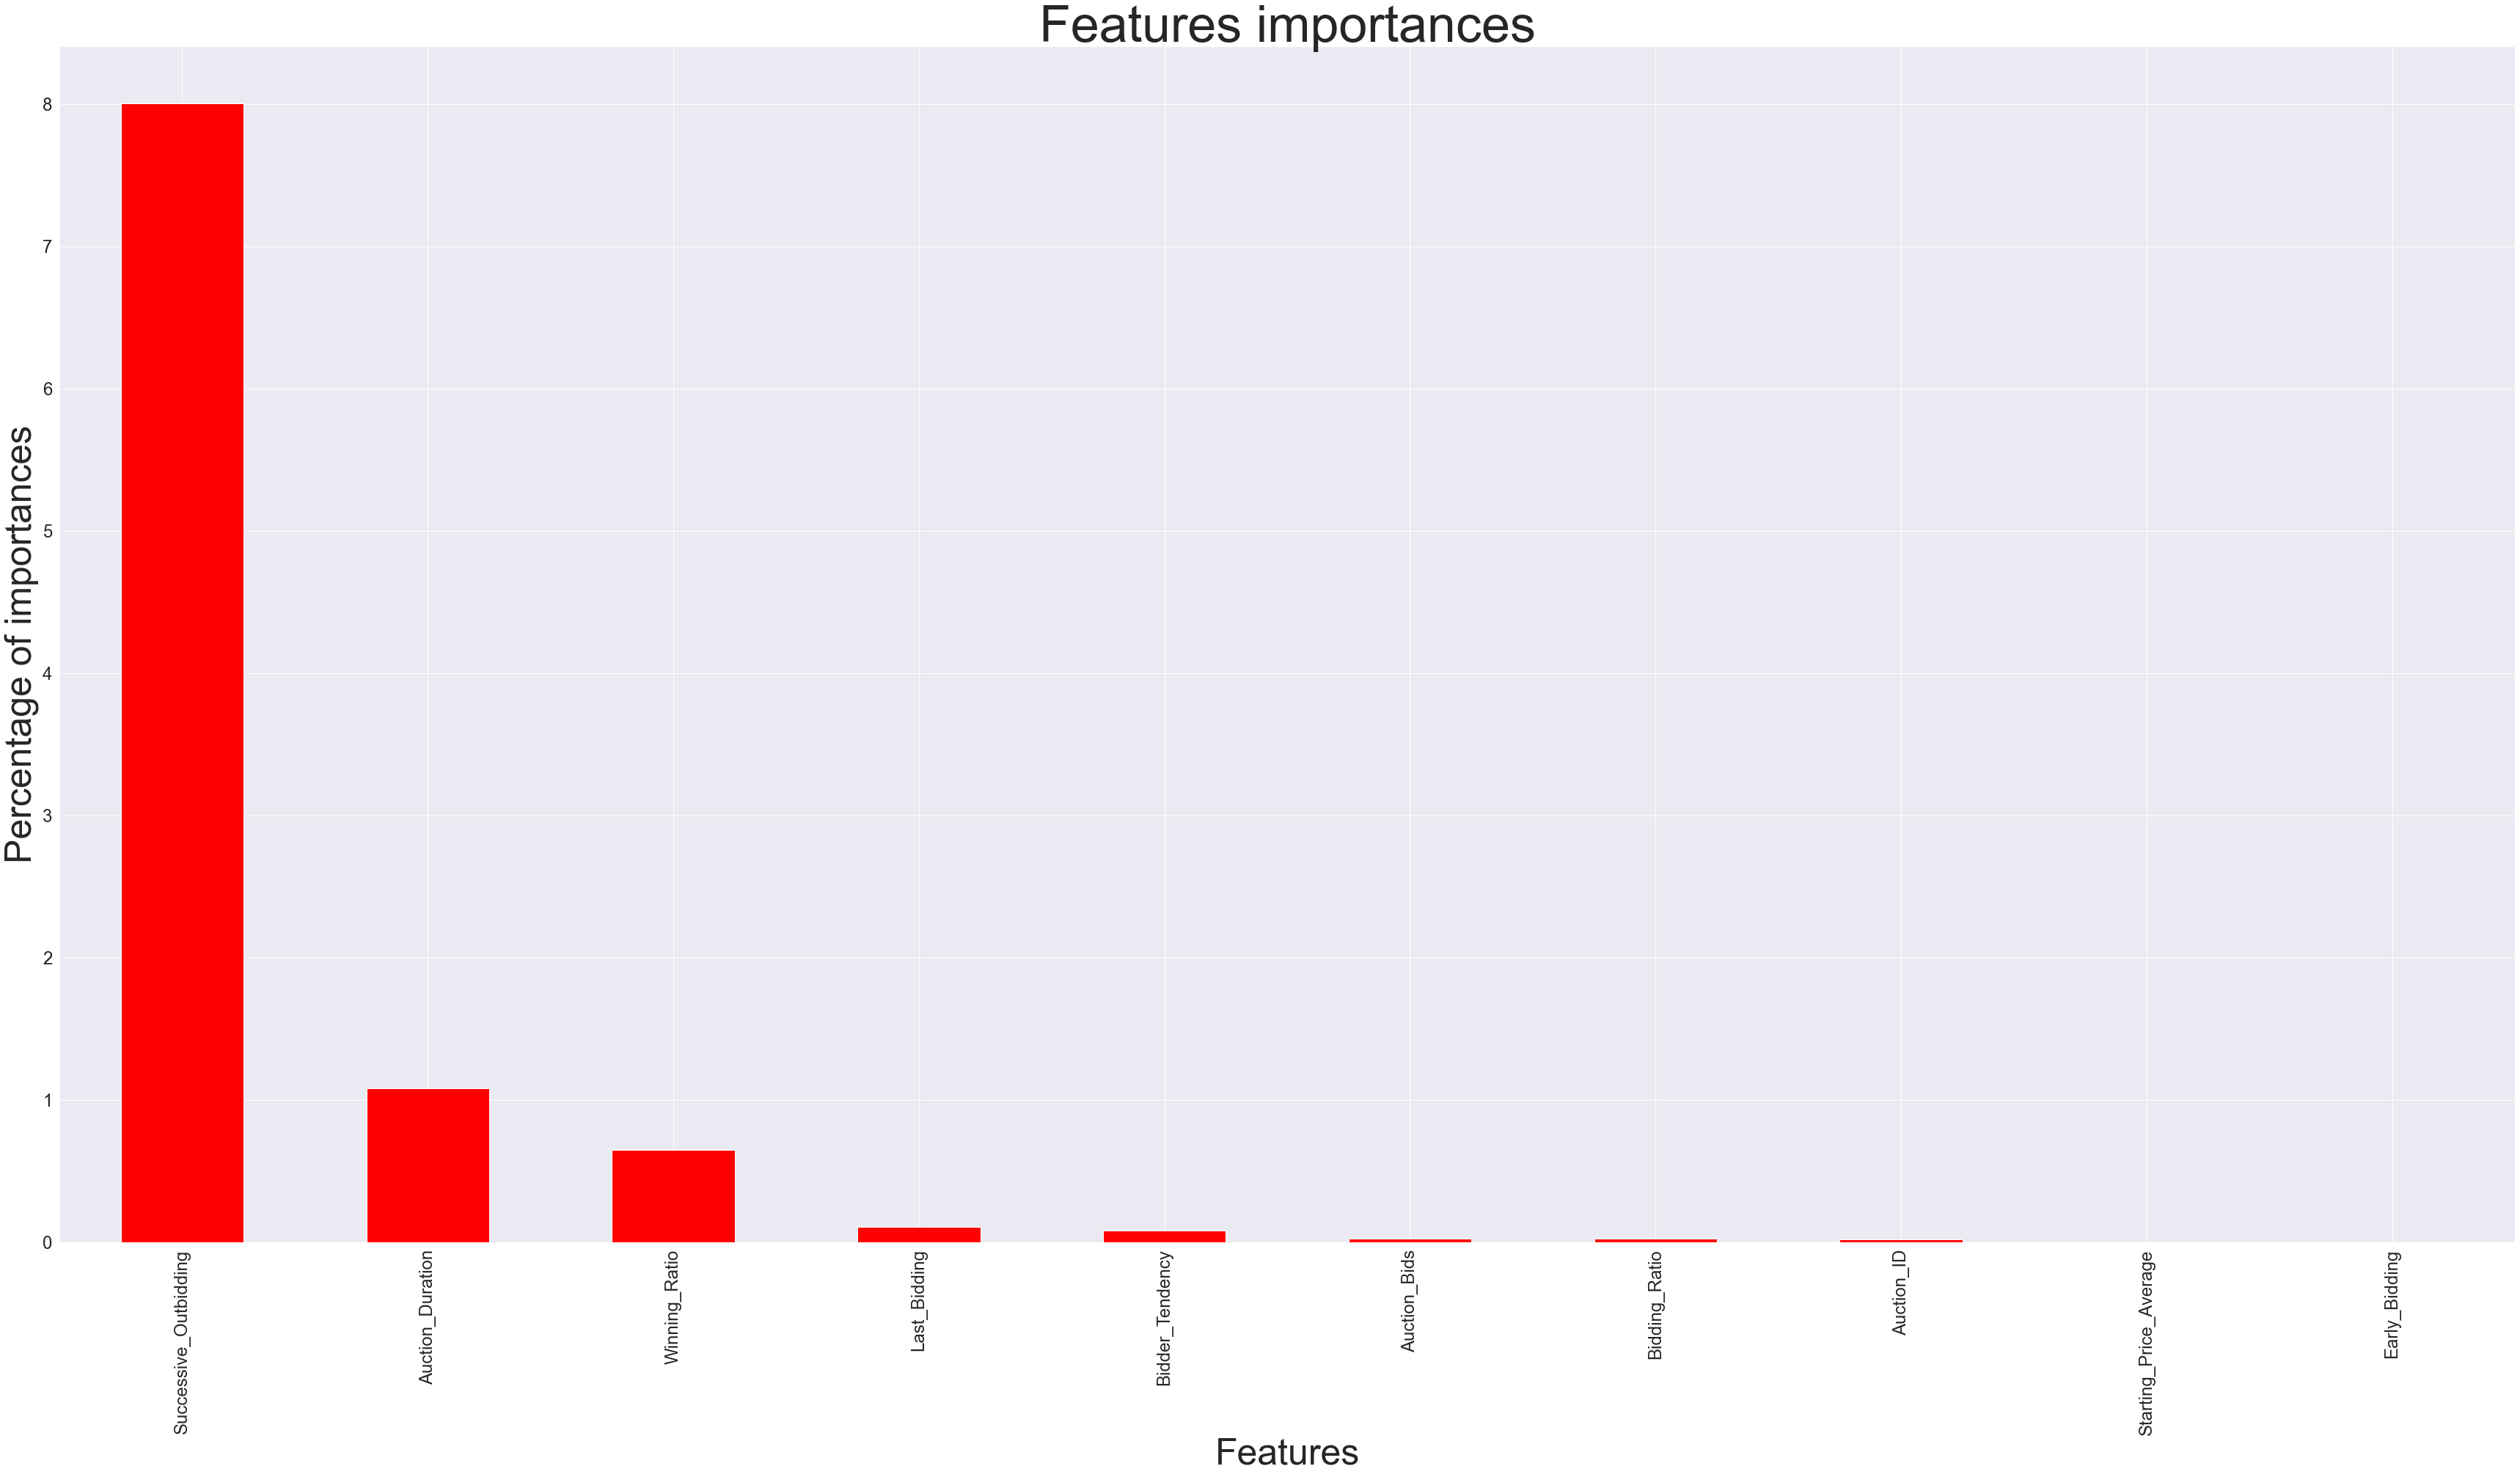

In [27]:
df_import = pd.DataFrame(importances, columns = ['Feature importances'], index=columns)
df_import['Percentage'] = pd.DataFrame((df_import.sort_values(by= ['Feature importances'], ascending=False)/df_import.shape[0])*100)
pd.options.display.float_format = "{:.2f}".format 
df_import=df_import.sort_values(by= ['Percentage'], ascending=False)

# plotting features importances
g = df_import['Percentage'].plot(kind = 'bar', figsize=(60,30), fontsize=24, color = 'red')
g.set_title('Features importances', fontsize=70)
g.set_xlabel('Features', fontsize=50)
g.set_ylabel('Percentage of importances', fontsize=50)

I see that three the most important features for predicting my target variable ¨Class" are Successive_Outbidding; Auction_Duration; Winning_Ratio, and the less important are Starting_Price_Average; Auction_ID; Early_Bidding.

## ●Scaling

One of the most important phases in the pre-processing of data prior to developing a machine learning model is feature scaling. Scaling can make the difference between a bad and a good machine learning model.
Machine learning methods that determine distances between data require feature scaling. When computing distances, the feature with the higher value range takes precedence if it is not scaled.
In my case, the Machine Learning that I will use (Logistic Regression and Decision Tree) and one of the methods that I will use to do dimensional reduction on the dataset (LDA) does not need to scale, but for the other method (PCA) it is very critical, once the PCA aims to collect the features with the most volatility, and big magnitude features have a lot of variances, which skews the PCA towards them. [5], [9], [28]

In [28]:
from sklearn.preprocessing import MinMaxScaler
X = df.drop(['Class'], axis=1)
y = df['Class']
#WHY

In [29]:
X

Auction_ID  Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
0            732             0.20           0.40                   0.00   
1            732             0.02           0.20                   0.00   
2            732             0.14           0.20                   0.00   
3            732             0.10           0.20                   0.00   
4            900             0.05           0.22                   0.00   
...          ...              ...            ...                    ...   
6316         760             0.33           0.16                   1.00   
6317        2481             0.03           0.13                   0.00   
6318        2481             0.06           0.04                   0.00   
6319        2481             0.08           0.09                   0.00   
6320        2481             0.02           0.04                   0.00   

      Last_Bidding  Auction_Bids  Starting_Price_Average  Early_Bidding  \
0             0.00          0.00                    0.99           0.00   
1             0.01          0.00                    0.99           0.01   
2             0.00          0.00                    0.99           0.00   
3             0.10          0.00                    0.99           0.10   
4             0.00          0.00                    0.00           0.00   
...            ...           ...                     ...            ...   
6316          0.74          0.28                    0.99           0.69   
6317          0.01          0.22                    0.99           0.00   
6318          0.02          0.22                    0.99           0.02   
6319          0.07          0.22                    0.99           0.00   
6320          0.34          0.22                    0.99           0.34   

      Winning_Ratio  Auction_Duration  
0              0.67                 5  
1              0.94                 5  
2              1.00                 5  
3              1.00                 5  
4              0.50                 7  
...             ...               ...  
6316           0.89                 3  
6317           0.88                 7  
6318           0.00                 7  
6319           0.00                 7  
6320           0.00                 7  

[6321 rows x 10 columns]

In [30]:
# define min max scaler
MinMax = MinMaxScaler()
# transform data
MinMax = MinMax.fit_transform(X)
print(MinMax)

[[2.87011449e-01 2.00000000e-01 3.92857143e-01 ... 2.77805652e-05
  6.66666667e-01 4.44444444e-01]
 [2.87011449e-01 2.43902440e-02 1.90476190e-01 ... 1.31239915e-02
  9.44444444e-01 4.44444444e-01]
 [2.87011449e-01 1.42857143e-01 1.90476190e-01 ... 3.04196949e-03
  1.00000000e+00 4.44444444e-01]
 ...
 [9.77497039e-01 5.55555560e-02 3.20910973e-02 ... 1.56645883e-02
  0.00000000e+00 6.66666667e-01]
 [9.77497039e-01 7.69230770e-02 7.60869567e-02 ... 4.15054513e-04
  0.00000000e+00 6.66666667e-01]
 [9.77497039e-01 1.63934430e-02 3.20910973e-02 ... 3.40384410e-01
  0.00000000e+00 6.66666667e-01]]


In [31]:
df = pd.DataFrame(MinMax)
df.columns = X.columns
df

Auction_ID  Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
0           0.29             0.20           0.39                   0.00   
1           0.29             0.02           0.19                   0.00   
2           0.29             0.14           0.19                   0.00   
3           0.29             0.10           0.19                   0.00   
4           0.35             0.05           0.21                   0.00   
...          ...              ...            ...                    ...   
6316        0.30             0.33           0.15                   1.00   
6317        0.98             0.03           0.12                   0.00   
6318        0.98             0.06           0.03                   0.00   
6319        0.98             0.08           0.08                   0.00   
6320        0.98             0.02           0.03                   0.00   

      Last_Bidding  Auction_Bids  Starting_Price_Average  Early_Bidding  \
0             0.00          0.00                    0.99           0.00   
1             0.01          0.00                    0.99           0.01   
2             0.00          0.00                    0.99           0.00   
3             0.10          0.00                    0.99           0.10   
4             0.00          0.00                    0.00           0.00   
...            ...           ...                     ...            ...   
6316          0.74          0.36                    0.99           0.69   
6317          0.01          0.28                    0.99           0.00   
6318          0.02          0.28                    0.99           0.02   
6319          0.07          0.28                    0.99           0.00   
6320          0.34          0.28                    0.99           0.34   

      Winning_Ratio  Auction_Duration  
0              0.67              0.44  
1              0.94              0.44  
2              1.00              0.44  
3              1.00              0.44  
4              0.50              0.67  
...             ...               ...  
6316           0.89              0.22  
6317           0.88              0.67  
6318           0.00              0.67  
6319           0.00              0.67  
6320           0.00              0.67  

[6321 rows x 10 columns]

In [32]:
df_MinMax = df.join(y)
df_MinMax

Auction_ID  Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
0           0.29             0.20           0.39                   0.00   
1           0.29             0.02           0.19                   0.00   
2           0.29             0.14           0.19                   0.00   
3           0.29             0.10           0.19                   0.00   
4           0.35             0.05           0.21                   0.00   
...          ...              ...            ...                    ...   
6316        0.30             0.33           0.15                   1.00   
6317        0.98             0.03           0.12                   0.00   
6318        0.98             0.06           0.03                   0.00   
6319        0.98             0.08           0.08                   0.00   
6320        0.98             0.02           0.03                   0.00   

      Last_Bidding  Auction_Bids  Starting_Price_Average  Early_Bidding  \
0             0.00          0.00                    0.99           0.00   
1             0.01          0.00                    0.99           0.01   
2             0.00          0.00                    0.99           0.00   
3             0.10          0.00                    0.99           0.10   
4             0.00          0.00                    0.00           0.00   
...            ...           ...                     ...            ...   
6316          0.74          0.36                    0.99           0.69   
6317          0.01          0.28                    0.99           0.00   
6318          0.02          0.28                    0.99           0.02   
6319          0.07          0.28                    0.99           0.00   
6320          0.34          0.28                    0.99           0.34   

      Winning_Ratio  Auction_Duration  Class  
0              0.67              0.44      0  
1              0.94              0.44      0  
2              1.00              0.44      0  
3              1.00              0.44      0  
4              0.50              0.67      0  
...             ...               ...    ...  
6316           0.89              0.22      1  
6317           0.88              0.67      0  
6318           0.00              0.67      0  
6319           0.00              0.67      0  
6320           0.00              0.67      0  

[6321 rows x 11 columns]

In [33]:
df_MinMax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Auction_ID              6321 non-null   float64
 1   Bidder_Tendency         6321 non-null   float64
 2   Bidding_Ratio           6321 non-null   float64
 3   Successive_Outbidding   6321 non-null   float64
 4   Last_Bidding            6321 non-null   float64
 5   Auction_Bids            6321 non-null   float64
 6   Starting_Price_Average  6321 non-null   float64
 7   Early_Bidding           6321 non-null   float64
 8   Winning_Ratio           6321 non-null   float64
 9   Auction_Duration        6321 non-null   float64
 10  Class                   6321 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 543.3 KB


## ●Dimensional reduction on the dataset - LDA & PCA

### PCA

PCA is a statistical variance based procedure that converts a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. In other words, PCA is often used to simplify data, reduce noise, and find unmeasured “latent variables”.

In other words PCA is a technique for extracting key variables (in the form of components) from a large number of variables in a data set. this method collects low-dimensional features from a high-dimensional data collection by projecting irrelevant dimensions onto it, with the goal of hold as much information as possible.

First, I want to plot an Explained varaince ratio graph to see how much of the variance in the original data is encapsulated in the new component variables. [4],[5]

In [34]:
from sklearn.decomposition import PCA
df_pca = df_MinMax.drop(["Class"], axis=1)

In [35]:
df_pca

Auction_ID  Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
0           0.29             0.20           0.39                   0.00   
1           0.29             0.02           0.19                   0.00   
2           0.29             0.14           0.19                   0.00   
3           0.29             0.10           0.19                   0.00   
4           0.35             0.05           0.21                   0.00   
...          ...              ...            ...                    ...   
6316        0.30             0.33           0.15                   1.00   
6317        0.98             0.03           0.12                   0.00   
6318        0.98             0.06           0.03                   0.00   
6319        0.98             0.08           0.08                   0.00   
6320        0.98             0.02           0.03                   0.00   

      Last_Bidding  Auction_Bids  Starting_Price_Average  Early_Bidding  \
0             0.00          0.00                    0.99           0.00   
1             0.01          0.00                    0.99           0.01   
2             0.00          0.00                    0.99           0.00   
3             0.10          0.00                    0.99           0.10   
4             0.00          0.00                    0.00           0.00   
...            ...           ...                     ...            ...   
6316          0.74          0.36                    0.99           0.69   
6317          0.01          0.28                    0.99           0.00   
6318          0.02          0.28                    0.99           0.02   
6319          0.07          0.28                    0.99           0.00   
6320          0.34          0.28                    0.99           0.34   

      Winning_Ratio  Auction_Duration  
0              0.67              0.44  
1              0.94              0.44  
2              1.00              0.44  
3              1.00              0.44  
4              0.50              0.67  
...             ...               ...  
6316           0.89              0.22  
6317           0.88              0.67  
6318           0.00              0.67  
6319           0.00              0.67  
6320           0.00              0.67  

[6321 rows x 10 columns]

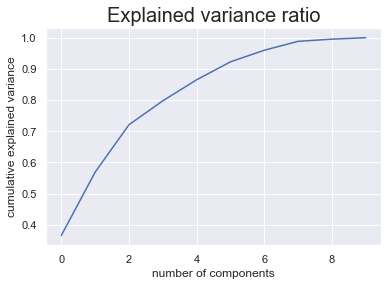

In [36]:
pca = PCA().fit(df_pca) 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained variance ratio', fontsize = 20)
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');

In [37]:
pca = PCA(0.90).fit(df_pca)
pca.n_components_

6

From the graph above we see that in order to keep 90% of the original data we need to use 6 components.

In [38]:
print(pca.components_) 

[[ 4.03686252e-02  3.95665516e-03 -8.44171779e-02 -1.15793637e-02
   4.19775562e-01  3.69008247e-01  6.15290307e-01  4.32744432e-01
  -3.35293128e-01  2.10803746e-02]
 [ 1.41795243e-02  9.04869343e-02  1.45070840e-01  2.63998264e-01
   4.94070654e-01 -1.54945815e-01 -2.03839218e-01  4.56122234e-01
   6.18791381e-01 -1.59910968e-02]
 [-5.04857453e-02  1.51854337e-01  1.20675068e-01  3.26951169e-01
  -2.79306648e-01  1.81557030e-01  6.11504747e-01 -3.18452305e-01
   5.16165812e-01  1.34044907e-02]
 [ 9.19057276e-01  4.37089862e-02  2.57685537e-02  1.24962132e-01
  -3.86407970e-02  1.94789366e-01 -1.17029373e-01 -5.32043489e-02
   8.51439455e-04  2.84921718e-01]
 [-3.45614837e-01  4.08726186e-02  1.52791587e-02  1.26124628e-01
   9.40740771e-03  1.38523845e-01 -1.22965793e-01  4.10285988e-03
  -4.83176970e-02  9.08839681e-01]
 [-1.39072429e-01  2.53349000e-01  1.19530927e-01  7.06215690e-01
  -1.73005393e-02  3.37014062e-01 -3.05562248e-01 -3.73439455e-02
  -3.45215275e-01 -2.75010307e-01

In [39]:
print(pca.explained_variance_) 

[0.40996983 0.22693633 0.17008356 0.08579534 0.07547109 0.06433828]


First 3 components contain the most ammount of data while the last three contain less than 20%. This the last step I want to create a DataFrame with 6 components and a target variable.

In [40]:
pca = PCA(6)
PCA_df = pca.fit_transform(df_pca)
PCA_df.shape

(6321, 6)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

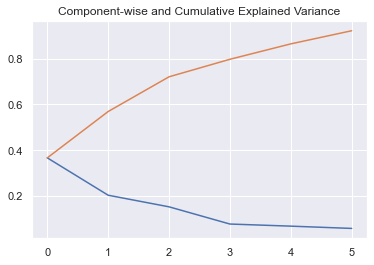

In [41]:
plt.plot(range(6), pca.explained_variance_ratio_)
plt.plot(range(6), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

In the above graph, the blue line represents component-wise explained variance while the orange line represents the cumulative explained variance. I am able to explain around 90% variance in the dataset using six components. 

In [42]:
PCA_df_MinMax = pd.DataFrame(PCA_df, columns =['C1', 'C2', 'C3', 'C4','C5','C6'])
PCA_df_MinMax["Class"] = df_MinMax["Class"]
PCA_df_MinMax

C1    C2    C3    C4    C5    C6  Class
0    -0.30 -0.29  0.70 -0.25 -0.02 -0.35      0
1    -0.36 -0.15  0.79 -0.27 -0.05 -0.51      0
2    -0.39 -0.11  0.84 -0.26 -0.04 -0.50      0
3    -0.31 -0.03  0.78 -0.27 -0.05 -0.52      0
4    -0.83 -0.23 -0.03 -0.02  0.28 -0.12      0
...    ...   ...   ...   ...   ...   ...    ...
6316  0.37  0.72  0.77 -0.18 -0.05  0.43      1
6317 -0.21 -0.24  0.77  0.48 -0.04 -0.56      0
6318  0.10 -0.79  0.30  0.48 -0.00 -0.26      0
6319  0.12 -0.76  0.30  0.48  0.00 -0.25      0
6320  0.38 -0.48  0.10  0.45  0.00 -0.29      0

[6321 rows x 7 columns]

In [43]:
import plotly.express as px

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ * 100)
}

fig = px.scatter_matrix(
    PCA_df,
    labels=labels,
    dimensions=range(2),
    color=PCA_df_MinMax["Class"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

###  LDA
Linear Discriminant Analysis (LDA) is a multi-class classification linear machine learning algorithm.

The goal with Linear Discriminant Analysis is to better separate (or discriminate) the samples in the training dataset based on their class values. The model aims to discover a linear combination of input variables that achieves the best sample separation across classes (centroids or class means) and the least sample separation within each class. [4], [10], [25]

I start with fit_transform of the both dependent and independent variables and then will take a look at the explained_variance_ratio.

In [44]:
X = df_MinMax.drop(["Class"], axis=1)
y = df_MinMax['Class']

In [45]:
X.shape

(6321, 10)

In [46]:
y.shape

(6321,)

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [48]:
lda.explained_variance_ratio_

array([1.])

Because my target variable has only two classes, the LDA has reduced the number of components to one. We could plot the data on the two-dimensional graph if we had at least two components. In our case, however, the data is represented by a single dimension, and the plot would resemble a simple one-dimensional line. I'd like to make a DataFrame and record LDA 1 as well as the target variable in it.

In [49]:
linear_df = pd.DataFrame(data = X_lda, columns = ['LDA 1'])
df_lda = linear_df.join(y, how='outer')
df_lda.head(10)


LDA 1  Class
0  -0.71      0
1  -0.64      0
2  -0.61      0
3  -0.61      0
4  -0.82      0
5  -0.72      0
6  -0.70      0
7   7.61      1
8   7.40      1
9   3.38      1

From the table above we see, that negative numbers in LDA 1 belong to '0 class' and positive numbers belong to '1 class'.

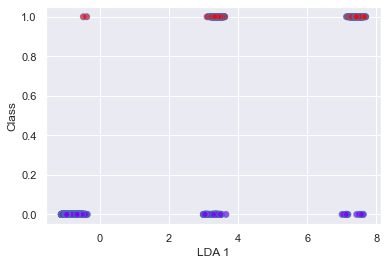

In [50]:
plt.xlabel('LDA 1')
plt.ylabel('Class')
plt.scatter(
    df_lda['LDA 1'],
    df_lda['Class'],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

This plot clearly shows that the classes were separated more clearly, in contrast to the PCA model, where the classes began to mix as the amount of information retained from the components decreased.

## LDA vs. PCA

Linear discriminant analysis, like PCA, seeks linear combinations of features that best explain the data.

The main distinction is that linear discriminant analysis is a supervised dimensionality reduction technique that also performs data classification.

As illustrated in the figures, LDA focuses on identifying a subspace feature that enhances the groups' separability and PCA is concerned with identifying the direction of maximum variation in a data set. In other words, the class label is ignored by PCA, which is an unsupervised Dimensionality reduction technique.

LDA and PCA both form a new set of components.
The first principal component formed by PCA, PC1, will account for the greatest variation in the data, PC2 is the second-best at capturing maximum variation and so on.
The first new axes formed by Linear Discriminant Analysis, LD1, will account for the majority of variation between groups or categories, followed by LD2 and so on, however because this dataset is binary, the LDA only developed one component. [4], [5], [10], [25]


# Second Section - Machine Learning Models

For this part of Machine Learning, as my problem is classification I chose two Supervised Machine Learning: Logistic Regression and Decision Tree models.[14], [16], [18]

Logistic Regression is a supervised classification model, used for binary and linear classification problems and can be generalized to multiclass classification. This model is easy to achieve good performance with separate linear classes. in additional Logistic regression's range is bounded between 0 and 1. [14],[16],[18],[32]

The Decision Tree is a Supervised Machine Learning Algorithm that makes decisions based on a set of rules, and it can handle both classification and regression tasks. The idea behind Decision Trees is that you utilize the dataset features to build yes/no questions, splitting the dataset until you isolate all data points belonging to each class, and the outcome of asking a question splits the dataset based on the value of a feature, creating new nodes. [6],[14],[16],[18],[21],[27]

The choice for the Logistic regression model is based on the characteristics of the dataset where the dependent variable "Class" is binary (0 and 1) and the independent variables are in the range between 0 and 1.[14],[16],[18],[32]

And Decision Tree was chosen because it is a basic algorithm model that does not require a lot of data preparation prior to developing the model and can handle a variety of data sources.[6],[14],[16],[18],[21],[27]

I want to build two models that behave differently, one that requires less preparation and one that matches better with the dataset.

My goal in this step is to make four Machine Learning models where I will use the dataset version that I applied the LDA because I am dealing with a classification problem and the LDA deal better with class than PCA as concluded in the previous step, and to validate the results of the models, I will use Cross Validation, Confusion Matrix and Classification report. [11],[17],[29] 

I will run a Logistic Regression model with the class balanced and one with the class unbalanced. And I will do the same for the Decision Tree model in order to compare which model will perform better. To deal with the probelm of unbalanced dataset I will apply the SMOTE technique, once for a supervised machine learning model, it is important to train an estimator on balanced data so the model is equally informed on all classes. [3],[7], [13], [17], 

SMOTE is an oversampling method that produces "synthetic" examples rather than replacement oversampling. By injecting synthetic cases along the line segments connecting any/all of the k minority class nearest neighbors, the minority class is over-sampled. The neighbors from the k nearest neighbors are picked at random depending on the quantity of over-sampling necessary. [12],[19],

I will use hyperparameters to get the best results for my models. GridSearch will be used to find the best hyperparameters for each model I will use.

Grid-searching is the process of sifting through data to find the best parameters for a certain model. Certain parameters are required depending on the type of model used, this process is not limited to a single model type. In other words Grid-searching can be used in machine learning to determine the optimum parameters for a particular model. It is worth noting that Grid-searching is computationally intensive and can take a long time to complete. This process will create a model based on every possible parameter combination where It goes over each parameter combination and creates a model for each one.

GridSearchCV does cross-validation in addition to grid search. The model is trained using cross-validation. We already know that we divide the data into two pieces before training the model with it: train data and test data. The method of cross-validation divides the train data into two parts: the train data and the validation data. [11],[17],[22],[23],[24],[26],[29],[30]

In [51]:
from sklearn.model_selection import cross_val_score     
from sklearn.metrics import confusion_matrix             
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression                     
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE

from IPython.display import Image

%matplotlib inline

As a first step of the stage I will separate the target variable from dependent variables, creating two separation one for the unbalanced class and one for the balanced class

In [52]:
X = df_lda.drop(columns='Class')
y = df_lda['Class']

In [53]:
Xsmote = df_lda.drop(columns='Class')
ysmote = df_lda['Class']

Next, I will split the dataset on train and test parts, keeping train part equals to 65% and train part 35%.

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4108, 1), (2213, 1), (4108,), (2213,))

In [55]:
from sklearn.model_selection import train_test_split
X_trainsmote, X_testsmote, y_trainsmote, y_testsmote = train_test_split(Xsmote, ysmote, test_size=0.35, random_state=1, shuffle=True)
X_trainsmote.shape, X_testsmote.shape, y_trainsmote.shape, y_testsmote.shape

((4108, 1), (2213, 1), (4108,), (2213,))

## ●Logistic Regression

### Unbalanced Class

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predlog = logreg.predict(X_test)

I want to define the greatest model parameters in the following stage to attain the best possible accuracy. I will use the following LogisticRegression parameters in the GridSearchCV:

● Solvers;

Algorithm to use in the optimization problem:

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
‘liblinear’ is limited to one-versus-rest schemes.

● Penalty;

Specify the norm of the penalty:

'none': no penalty is added;
'l2': add a L2 penalty term and it is the default choice;
'l1': add a L1 penalty term;

● C_values;

Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization. [34] 

In [57]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [58]:
gridlog = dict(solver=solvers,penalty=penalty,C=c_values)
grid_searchlog = GridSearchCV(cv= 10, estimator=logreg, param_grid=gridlog, n_jobs=-1, scoring='accuracy',error_score=0)
grid_resultlog = grid_searchlog.fit(X, y)

In [59]:
print("Best: %f using %s" % (grid_resultlog.best_score_, grid_resultlog.best_params_))
meanslog = grid_resultlog.cv_results_['mean_test_score']
stdslog = grid_resultlog.cv_results_['std_test_score']
paramslog = grid_resultlog.cv_results_['params']

Best: 0.980224 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [60]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
logreg = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
logreg.fit(X_train, y_train)
y_predlog = logreg.predict(X_test)

In [61]:
print('Training score: {:.3f}'.format(logreg.score(X_train,y_train)))
print('Testing score: {:.3f}'.format(logreg.score(X_test,y_test)))
print(cross_val_score(logreg, X, y, cv=cv, scoring='accuracy').mean())

Training score: 0.979
Testing score: 0.975
0.9800665406843041


              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1989
           1       0.80      1.00      0.89       224

    accuracy                           0.97      2213
   macro avg       0.90      0.98      0.94      2213
weighted avg       0.98      0.97      0.98      2213

AxesSubplot(0.125,0.125;0.775x0.755)


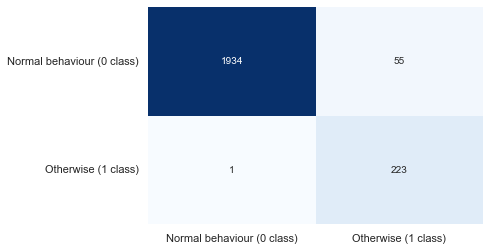

In [62]:
print(classification_report(y_test, y_predlog))
print(sns.heatmap(confusion_matrix(y_test, y_predlog), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

I can obserse that the model perfomed very well. Over 1934 "0" class values 55 were predicted as False Positive and over 223 "1" class values only 1 was predicted as False Negative, which is a very good result.

### Balanced Class

In [63]:
smt = SMOTE()

X_trainsmote, y_trainsmote = smt.fit_resample(X_trainsmote, y_trainsmote)

X_trainsmote.shape, X_testsmote.shape, y_trainsmote.shape, y_testsmote.shape

((7314, 1), (2213, 1), (7314,), (2213,))

In [64]:
logregSMOTE = LogisticRegression()
logregSMOTE.fit(X_trainsmote, y_trainsmote)
y_predlogSmote = logregSMOTE.predict(X_testsmote)

In [65]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [66]:
gridlog = dict(solver=solvers,penalty=penalty,C=c_values)
grid_searchSMOTE = GridSearchCV(cv= 10, estimator=logregSMOTE, param_grid=gridlog, n_jobs=-1, scoring='accuracy',error_score=0)
grid_resultSMOTE = grid_searchSMOTE.fit(Xsmote, ysmote)

In [67]:
print("Best: %f using %s" % (grid_resultSMOTE.best_score_, grid_resultSMOTE.best_params_))
meanslogSmote = grid_resultSMOTE.cv_results_['mean_test_score']
stdslogSmote = grid_resultSMOTE.cv_results_['std_test_score']
paramslogSmote = grid_resultSMOTE.cv_results_['params']

Best: 0.980224 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [68]:
logregSMOTE = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
logregSMOTE.fit(X_trainsmote, y_trainsmote)
y_predlogSmote = logregSMOTE.predict(X_testsmote)

In [69]:
print('Training score: {:.3f}'.format(logregSMOTE.score(X_trainsmote,y_trainsmote)))
print('Testing score: {:.3f}'.format(logregSMOTE.score(X_testsmote,y_testsmote)))
print(cross_val_score(logregSMOTE, Xsmote, ysmote, cv=cv, scoring='accuracy').mean())

Training score: 0.985
Testing score: 0.970
0.9800665406843041


              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1989
           1       0.77      1.00      0.87       224

    accuracy                           0.97      2213
   macro avg       0.89      0.98      0.93      2213
weighted avg       0.98      0.97      0.97      2213

AxesSubplot(0.125,0.125;0.775x0.755)


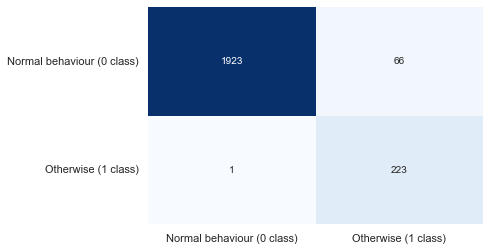

In [70]:
print(classification_report(y_testsmote, y_predlogSmote))
print(sns.heatmap(confusion_matrix(y_testsmote, y_predlogSmote), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

I can obserse that the model with the class balanced perfomed a bit worse than the first one. Over 1923 "0" class values 66 were predicted as False Positive and over 223 "1" class values only 1 was predicted as False Negative, which still a very good result.

## ●Decision Tree

### Unbalanced Class

In [71]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
y_predtree = tree.predict(X_test)

I want to specify the best parameters, similar to the previous model, in order to achieve the best accuracy. The following parameters will be checked for this model:

● Max_depth;

Max_depth - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

● Min_samples_leaf.

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.

For both hyperparameters defined I will create a range between 1 to 20. The estimator will check each value of both in order to define the best ones. [21]

In [72]:
depth = range(1, 20)
leaf = range(1, 20)

In [73]:
gridtree = dict(max_depth=depth,min_samples_leaf=leaf)
grid_searchtree = GridSearchCV(cv=10, estimator=tree, param_grid=gridtree, n_jobs=-1, scoring='accuracy',error_score=0)
grid_resulttree = grid_searchtree.fit(X, y)

In [74]:
print("Best: %f using %s" % (grid_resulttree.best_score_, grid_resulttree.best_params_))
meanstree = grid_resulttree.cv_results_['mean_test_score']
stdstree = grid_resulttree.cv_results_['std_test_score']
paramstree = grid_resulttree.cv_results_['params']

Best: 0.981806 using {'max_depth': 4, 'min_samples_leaf': 5}


In [75]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=1)
tree.fit(X_train, y_train)
y_predtree = tree.predict(X_test)

In [76]:
print('Training score: {:.3f}'.format(tree.score(X_train,y_train)))
print('Testing score: {:.3f}'.format(tree.score(X_test,y_test)))
print(cross_val_score(tree, X, y, cv=cv, scoring='accuracy').mean())

Training score: 0.984
Testing score: 0.978
0.9814908412822205


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1989
           1       0.83      0.99      0.90       224

    accuracy                           0.98      2213
   macro avg       0.91      0.98      0.95      2213
weighted avg       0.98      0.98      0.98      2213

AxesSubplot(0.125,0.125;0.775x0.755)


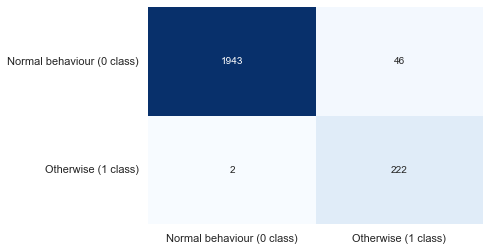

In [77]:
print(classification_report(y_test, y_predtree))
print(sns.heatmap(confusion_matrix(y_test, y_predtree), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

I can obserse that the model perform very well. Over 1943 "0" class values 46 were predicted as False Positive and over 222 "1" class values only 2 was predicted as False Negative, which is a very good result.

### Balanced Class

In [78]:
treeSMOTE = DecisionTreeClassifier(random_state=1)
treeSMOTE.fit(X_trainsmote, y_trainsmote)
y_predtreesmote = treeSMOTE.predict(X_testsmote)

In [79]:
depth = range(1, 20)
leaf = range(1, 20)

In [80]:
gridtree = dict(max_depth=depth,min_samples_leaf=leaf)
grid_searchtreeSMOTE = GridSearchCV(estimator=treeSMOTE, param_grid=gridtree, n_jobs=-1, scoring='accuracy',error_score=0)
grid_resulttreeSMOTE = grid_searchtreeSMOTE.fit(Xsmote, ysmote)

In [81]:
print("Best: %f using %s" % (grid_resulttreeSMOTE.best_score_, grid_resulttreeSMOTE.best_params_))
meanstreeSmote = grid_resulttreeSMOTE.cv_results_['mean_test_score']
stdstreeSmote = grid_resulttreeSMOTE.cv_results_['std_test_score']
paramstreeSmote = grid_resulttreeSMOTE.cv_results_['params']

Best: 0.981649 using {'max_depth': 4, 'min_samples_leaf': 4}


In [82]:
treeSMOTE = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=1)
treeSMOTE.fit(X_trainsmote, y_trainsmote)
y_predtreesmote = treeSMOTE.predict(X_testsmote)

In [83]:
print('Training score: {:.3f}'.format(treeSMOTE.score(X_trainsmote,y_trainsmote)))
print('Testing score: {:.3f}'.format(treeSMOTE.score(X_testsmote,y_testsmote)))
print(cross_val_score(treeSMOTE, Xsmote, ysmote, cv=cv, scoring='accuracy').mean())

Training score: 0.990
Testing score: 0.977
0.9810161577379166


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1989
           1       0.82      0.99      0.90       224

    accuracy                           0.98      2213
   macro avg       0.91      0.98      0.94      2213
weighted avg       0.98      0.98      0.98      2213

AxesSubplot(0.125,0.125;0.775x0.755)


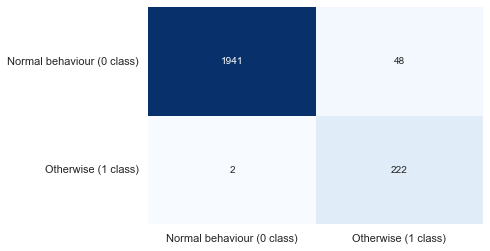

In [84]:
print(classification_report(y_testsmote, y_predtreesmote))
print(sns.heatmap(confusion_matrix(y_testsmote, y_predtreesmote), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

I can obserse that the balanced model perform a little bit worse. Over 1942 "0" class values 47 were predicted as False Positive and over 222 "1" class values only 2 was predicted as False Negative, which is still a very good result.

## ●Comparison of Machine Learning Modelling Outcomes 

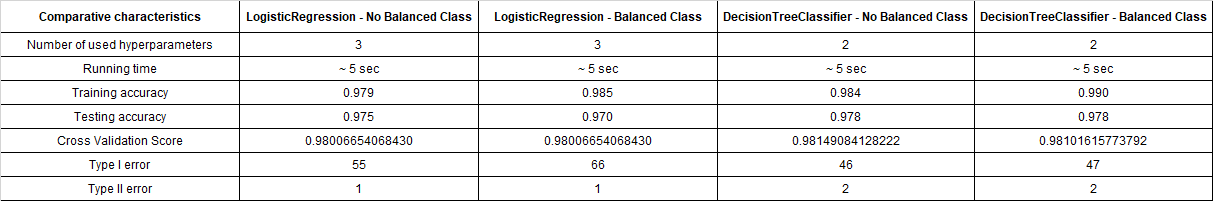

# Conclusion

This work was divided into two sessions, Data Preparation and Machine Leraning Modeling.

In the first session, I start exploring the dataset to better understand its characteristics, size, number of attributes, missing values, observation numbers and descriptive statistics. In this session I could have a better understanding of the dataset, where the dataset contained 6321 rows and 13 columns, did not contain missing values to be treated with some imputation technique, and was more composed of numerical data with only one column with the data type " object", only 2 features were not in the same range 0 to 1 and the main "Class" feature was not balanced.

In the second part of the first session, I started a deeper analysis of the first observations through EDA, where I could conclude that 3640 of the 6321 users contained in this dataset never won an auction and 826 won when they participated in the auctions on Ebay, none of the independent variables followed. a symmetrical normal distribution, the dataset did not contain any duplicated values but continuous three variables that through the Boxplot and Inter Quartile Range showed a high value of outliers, after an analysis of each variable, for two (Bidder_Tendency and Bidding_Ratio) I decided not to treat the outliers since it did not have the real meaning or more detailed information of the variables to perform any action, such as dropping or changing the values, as it could compromise some important information of the dataset, and for (Successive_Outbidding) it concludes that it was not about outliers because it is variable was represented by only 3 values and as most values were represented by ted by 0, through the boxplot and inter quartile, I ended up considering the values of 0.5 and 1 as outliers.

To get an idea of the correlation and importance of the independent variables with my dependent variable, I used heatmap correlation and applied the Decision Tree Classifier which ranged the features by their importance, and then I was able to conclude that only the Successive_Outbidding variable had a strong correlation with the dependent variable "Class".
In the third part of the first session, I dealt with the two variables that were not in the same range as the others, even knowing that for the models that I would apply for machine learning it was not necessary, it would be necessary to deal with the PCA in the next session, where the PCA aims to collect the features with the most volatility, and big magnitude features have a lot of variances, which skews the PCA towards them, so to overcome this obstacle I decided to apply MinMax Scaling, as MinMax scaling squeezes (or stretches) all feature values to be within the
range of 0 and 1 meeting the range of the other variables.

In the fourth and last part of the first session, I performed an analysis through the application of two-dimension reduction techniques "LDA" and "PCA", where The PCA and LDA are applied in dimensionality reduction when we have a linear problem in hand that means there is a linear relationship between input and output variables. 

Although PCA and LDA work on linear problems, they further have differences. The LDA models the difference between the classes of the data while PCA does not work to find any such difference in classes. 

In PCA, the factor analysis builds the feature combinations based on differences rather than similarities in LDA. So, after comparing both I could conclude that the application of them depends on the strategy choose, and for this project where I had to handle a classification problem, the LDA by its characteristic was the best option.

In the second stage of this work, I performed the application of two Logistic Regression and Decision Tree prediction models with hyperparameters determined through the GridSerchCV process (with cross validation) with the dataset that I applied the LDA, and I balanced the dataset by applying the SMOTE technique creating synthetic values for the minority class to avoid distribution bias in predictive ability.

The choice of the Linear regression model was because it is a model used for binary and linear classification problems and the range of the model is from 0 to 1 which qualifies it to be compatible with the characteristics of the dataset, where the dependent variable "Class" is binary and the independents the range is from 0 to 1.
And Decision Tree was chosen because it is a simple algorithm model that requires little data preparation prior to development and can handle a wide range of data sources, making this model a model with high performance.

The purpose of using these models was to be able to compare a model that needs more preparation and alignment of the dataset to have a high result with a model that does not need to have so much preparation to have a high result.
For this step, I made four models, two from Logistic Regression and two from Decision Tree, where I created a scenario with the dependent variable unbalanced and a scenario for the dependent variable balanced. My objective was to carry out an empirical comparison using Cross Validation, Confusion Matrix and Classification Report of the performance of these models in order to choose the model that performed better for the prediction of bids in the future.

Through the comparison I was able to conclude that all models had high performance with accuracy above 90% for both training, testing and the cross-validation score. Decision Tree was the model that performed better in precision and through the confusion matrix, surpassing the Logistic Regression model.

And between the two scenarios created (Balanced x Unbalanced), the scenario the unbalanced models for both Logistic Regression and Decision Tree performed better in the predictions according to the results obtained with Confusion Matrix, where between the balanced and unbalanced models of Logistic Regression , the unbalanced model Over 1934 "0" class values 55 were predicted as False Positive and over 223 "1" class values only 1 was predicted as False Negative, while for the Balanced model over 1923 "0" class values 66 were predicted as False Positive and over 223 "1" class values only 1 was predicted as False Negative. And for the unbalanced Decision Tree models Over 1943 "0" class values 46 were predicted as False Positive and over 222 "1" class values only 2 was predicted as False Negative and for the balanced model Over 1942 "0" class values 47 were predicted as False Positive and over 222 "1" class values only 2 was predicted as False Negative.


In my future work, I will focus on trying a different technique to balance the "class" variable, a different machine learning model and also trying to get more information about the variables with outliers in order to deal with them and try to improve the results of the models applied in this work.

# Works Cited

[1] Academy, Khan. “Interquartile Range (IQR) (Video).” Khan Academy, 27 Feb. 2018, www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th/v/calculating-interquartile-range-iqr. Accessed 1 May 2022.

[2] “Shapes of Distributions (Video).” Khan Academy, 12 Feb. 2015, www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6-shape-of-data/v/shapes-of-distributions. Accessed 27 Apr. 2022.

[3] Amruthnath, Nagdev. “Why Balancing Your Data Set Is Important? | R-Bloggers.” R Bloggers, 24 June 2020, www.r-bloggers.com/2020/06/why-balancing-your-data-set-is-important/#:~:text=One%20of%20the%20rules%20in. Accessed 3 May 2022.

[4] Analytics Vidhya. “Comprehensive Guide to 12 Dimensionality Reduction Techniques.” Analytics Vidhya, 26 Aug. 2018, www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/. Accessed 3 May 2022.

[5] Avcontentteam. “PCA: Practical Guide to Principal Component Analysis in R & Python.” Analytics Vidhya, 21 Mar. 2016, www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/. Accessed 1 May 2022.

[6] Bento, Carolina. “Decision Tree Classifier Explained in Real-Life: Picking a Vacation Destination.” Medium, 18 July 2021, https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575. Accessed 10 May 2022.

[7] Brownlee, Jason. “A Gentle Introduction to Imbalanced Classification.” Machine Learning Mastery, 22 Dec. 2019, https://machinelearningmastery.com/what-is-imbalanced-classification/. Accessed 3 May 2022.

[8] “How to Calculate Feature Importance with Python.” Machine Learning Mastery, 29 Mar. 2020, https://machinelearningmastery.com/calculate-feature-importance-with-python/. Accessed 14 May 2022.

[9] “How to Use StandardScaler and MinMaxScaler Transforms in Python.” Machine Learning Mastery, 9 June 2020, https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/. Accessed 10 May 2022.

[10] “Linear Discriminant Analysis for Dimensionality Reduction in Python.” Machine Learning Mastery, 12 May 2020, https://machinelearningmastery.com/linear-discriminant-analysis-for-dimensionality-reduction-in-python/#:~:text=Dimensionality%20reduction%20involves%20reducing%20the. Accessed 3 May 2022.

[11] “Repeated K-Fold Cross-Validation for Model Evaluation in Python.” Machine Learning Mastery, 2 Aug. 2020, https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/. Accessed 7 May 2022.

[12] “SMOTE for Imbalanced Classification with Python.” Machine Learning Mastery, 16 Jan. 2020, https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/. Accessed 3 May 2022.

[13] D’Angela, Anna. “Why Weight? The Importance of Training on Balanced Datasets.” Medium, 4 Feb. 2021, https://towardsdatascience.com/why-weight-the-importance-of-training-on-balanced-datasets-f1e54688e7df. Accessed 3 May 2022.

[14] Delua, Julianna. “Supervised vs. Unsupervised Learning: What’s the Difference?” Www.ibm.com, 12 Mar. 2021, www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning#:~:text=The%20main%20difference%20between%20supervised.

[15] Frost, Jim. “Interquartile Range (IQR): Definition and Uses.” Statistics Jim, 29 Aug. 2021, https://statisticsbyjim.com/basics/interquartile-range/. Accessed 1 May 2022.

[16] Fumo, David. “Types of Machine Learning Algorithms You Should Know.” Towards Data Science, Towards Data Science, 15 June 2017, https://towardsdatascience.com/types-of-machine-learning-algorithms-you-should-know-953a08248861. Accessed 13 May 2022.

[17] Gupta, Prashant. “Cross-Validation in Machine Learning.” Towards Data Science, Towards Data Science, 5 June 2017, https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f. Accessed 9 May 2022.

[18] Jason Brownlee. “Supervised and Unsupervised Machine Learning Algorithms.” Machine Learning Mastery, 22 Sept. 2016, https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/. Accessed 10 May 2022.

[19] Korstanje, Joos. “SMOTE.” Medium, 30 Aug. 2021, https://towardsdatascience.com/smote-fdce2f605729. Accessed 3 May 2022.

[20] Kumar, Satyam. “Essential Guide to Handle Outliers for Your Logistic Regression Model.” Geek Culture, 26 Aug. 2021, https://medium.com/geekculture/essential-guide-to-handle-outliers-for-your-logistic-regression-model-63c97690a84d. Accessed 2 May 2022.

[21] Learn, Scikit. “1.10. Decision Trees.” Scikit-Learn, https://scikit-learn.org/stable/modules/tree.html#:~:text=Decision%20Trees%20(DTs)%20are%20a. Accessed 10 May 2022.

[22] “3.2. Tuning the Hyper-Parameters of an Estimator — Scikit-Learn 0.22 Documentation.” Scikit-Learn.org, 2012, scikit-https://learn.org/stable/modules/grid_search.html. Accessed 13 May 2022.

[23] “Sklearn.model_selection.GridSearchCV — Scikit-Learn 0.22 Documentation.” Scikit-Learn.org, 2019, https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV. Accessed 14 
May 2022.

[24] Lutins, Evan. “Grid Searching in Machine Learning: Quick Explanation and Python Implementation.” Medium, 13 Sept. 2017, https://elutins.medium.com/grid-searching-in-machine-learning-quick-explanation-and-python-implementation-550552200596. Accessed 7 May 
2022.

[25] Maklin, Cory. “Linear Discriminant Analysis in Python.” Medium, 9 May 2022, https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2. Accessed 10 May 2022.

[26] Nyuytiymbiy, Kizito. “Parameters and Hyperparameters in Machine Learning and Deep Learning.” Medium, 15 Jan. 2022, https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac#:~:text=Hyperparameters%20are%20parameters%20whose%20values. Accessed 12 May 2022.

[27] Ronaghan, Stacey. “The Mathematics of Decision Trees, Random Forest and Feature Importance in Scikit-Learn and Spark.” Medium, Towards Data Science, 11 May 2018, https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3. Accessed 14 May 2022.

[28] Roy, Baijayanta. “All about Feature Scaling.” Medium, 7 Apr. 2020, https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35. Accessed 8 May 2022.

[29] SciKit-Learn. “3.1. Cross-Validation: Evaluating Estimator Performance — Scikit-Learn 0.21.3 Documentation.” Scikit-Learn.org, 2009, https://scikit-learn.org/stable/modules/cross_validation.html. Accessed 9 May 2022.

[30] Shah, Rahul. “GridSearchCV |Tune Hyperparameters with GridSearchCV.” Analytics Vidhya, 23 June 2021, www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/. Accessed 11 May 2022.

[31] Shin, Terence. “Understanding Feature Importance and How to Implement It in Python.” Medium, 26 Feb. 2021, towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285. Accessed 14 May 2022.

[32] Thomas W. Edgar. “Logistic Regression - an Overview | ScienceDirect Topics.” Www.sciencedirect.com, 2017, www.sciencedirect.com/topics/computer-science/logistic-regression#:~:text=Logistic%20regression%20is%20a%20process.

[33] Zach. “How to Calculate the Interquartile Range in Python.” Statology, 21 Aug. 2020, www.statology.org/interquartile-range-python/#:~:text=It%20is%20calculated%20as%20the. Accessed 1 May 2022.

[34] “Sklearn.linear_model.LogisticRegression — Scikit-Learn 0.24.1 Documentation.” Scikit-Learn.org, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression. Accessed 14 May 2022.
